### Numerical Quadrature

Consider the following integral

$$
\int_{x_{0}}^{x_{0}+h} e^{x}\,dx = \left[e^{x}\right]^{x_{0}+h}_{x_{0}} = e^{(x_{0}+h)} - e^{x_{0}}
$$

with $x_{0}=0$ and $h_{0} = 1.0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
  ''' Implements function to integrate

  :param x: independent variable
  :type x: double or numpy array
  :return: function value
  :rtype: double or numpy array
  '''
  return np.exp(x)

In [3]:
def midpoint_rule(fun,a,b,n):
  ''' Implements the composite mid point rule 
      the simplest type of open Newton-Cotes
      integration formula

  :param fun: the function to integrate
  :type fun: function
  :param a: lower integration bound
  :type a: double
  :param b: upper integration bound
  :type b: double
  :param n: number of integration sub-intervals
  :type n: integer
  :return: the integral of fun over the interval [a,b]
  :rtype: double
  '''
  h = (b-a)/n
  res = 0.0
  for i in range(n):
    x0 = a+i*h + h/2.0
    res += h*fun(x0)
  return res

def trapezoid_rule(fun,a,b,n):
  ''' Implements the composite trapezoidal rule

  :param fun: the function to integrate
  :type fun: function
  :param a: lower integration bound
  :type a: double
  :param b: upper integration bound
  :type b: double
  :param n: number of integration sub-intervals
  :type n: integer
  :return: the integral of fun over the interval [a,b]
  :rtype: double
  '''
  h = (b-a)/n
  res = 0.0
  for i in range(n):
    x0 = a+i*h
    x1 = a+(i+1)*h
    res += (h/2)*(fun(x0) + fun(x1))
  return res

def simpson_rule(fun,a,b,n):
  ''' Implements the composite Simpson's rule

  :param fun: the function to integrate
  :type fun: function
  :param a: lower integration bound
  :type a: double
  :param b: upper integration bound
  :type b: double
  :param n: number of integration sub-intervals
  :type n: integer
  :return: the integral of fun over the interval [a,b]
  :rtype: double
  '''
  h = (b-a)/n
  res = 0.0
  for i in range(n):
    x0 = a+i*h
    x1 = a+i*h + h/2
    x2 = a+(i+1)*h
    res += (h/6)*(fun(x0) + 4*fun(x1) + fun(x2))
  return res

def gauss_legendre_2pt_rule(fun,a,b,n):
  ''' Implements the 2-point Gauss-Legendre 
      quadrature rule

  :param fun: the function to integrate
  :type fun: function
  :param a: lower integration bound
  :type a: double
  :param b: upper integration bound
  :type b: double
  :param n: number of integration sub-intervals
  :type n: integer
  :return: the integral of fun over the interval [a,b]
  :rtype: double
  '''
  h = (b-a)/n
  res = 0.0
  for i in range(n):
    x0 = a + i*h + (1-np.sqrt(3)/3.0)*(h/2)
    x1 = a + i*h + (1+np.sqrt(3)/3.0)*(h/2)
    res += (h/2)*(fun(x0) + fun(x1))
  return res

def gauss_legendre_3pt_rule(fun,a,b,n):
  ''' Implements the 3-point Gauss-Legendre 
      quadrature rule

  :param fun: the function to integrate
  :type fun: function
  :param a: lower integration bound
  :type a: double
  :param b: upper integration bound
  :type b: double
  :param n: number of integration sub-intervals
  :type n: integer
  :return: the integral of fun over the interval [a,b]
  :rtype: double
  '''
  h = (b-a)/n
  res = 0.0
  for i in range(n):
    x0 = a + i*h + (1-np.sqrt(3.0/5.0))*(h/2.0)
    x1 = a + i*h + h/2
    x2 = a + i*h + (1+np.sqrt(3.0/5.0))*(h/2.0)
    res += (h/18.0)*(5.0*fun(x0) + 8.0*fun(x1) + 5.0*fun(x2))
  return res

Now we consider the interval $[x_{0},x_{0}+h]$ starting from $h_{0}=1$ and we reduce progressively the size of the interval.

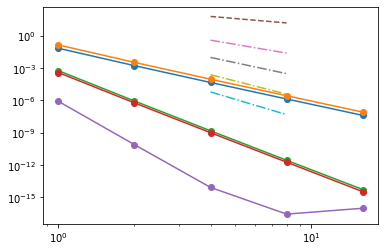

In [4]:
a = 0.0
integral_res = np.zeros((5,7))
for i in range(5):
  n = 2**i
  b = 1.0/n  
  h = b
  integral_res[i,0] = midpoint_rule(f,a,b,n)
  integral_res[i,1] = trapezoid_rule(f,a,b,n)
  integral_res[i,2] = simpson_rule(f,a,b,n)
  integral_res[i,3] = gauss_legendre_2pt_rule(f,a,b,n)
  integral_res[i,4] = gauss_legendre_3pt_rule(f,a,b,n)
  integral_res[i,5] = 1/h
  integral_res[i,6] = np.exp(h)-1.0

for loopA in range(5):
  plt.loglog(integral_res[:,5],np.abs(integral_res[:,loopA]-integral_res[:,6]),'o-')
hh = np.array([4.,8.])
yy2 = 1000.0*hh**(-2)
yy4 = 100.0*hh**(-4)
yy5 = 10.0*hh**(-5)  
yy6 = 1.0*hh**(-6)  
yy7 = 0.1*hh**(-7)  
plt.loglog(hh,yy2,'--')
plt.loglog(hh,yy4,'-.')
plt.loglog(hh,yy5,'-.')
plt.loglog(hh,yy6,'-.')
plt.loglog(hh,yy7,'-.')
plt.show()

We now fix the lower and upper integration bounds and prograssively increase the number $n$ of sub-intervals.

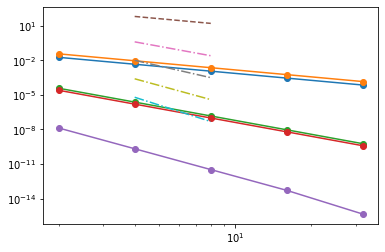

In [5]:
a = 0.0
b = 1.0
integral_res = np.zeros((6,7))
for i in range(6):
  n = 2**i
  h = (b-a)/n
  integral_res[i,0] = midpoint_rule(f,a,b,n)
  integral_res[i,1] = trapezoid_rule(f,a,b,n)
  integral_res[i,2] = simpson_rule(f,a,b,n)
  integral_res[i,3] = gauss_legendre_2pt_rule(f,a,b,n)
  integral_res[i,4] = gauss_legendre_3pt_rule(f,a,b,n)
  integral_res[i,5] = n
  integral_res[i,6] = 1/h

for loopA in range(5):
  plt.loglog(integral_res[1:,6],np.abs(integral_res[1:,loopA]-(np.exp(1)-1.0)),'o-')
hh = np.array([4.,8.])
yy2 = 1000.0*hh**(-2)
yy4 = 100.0*hh**(-4)
yy5 = 10.0*hh**(-5)  
yy6 = 1.0*hh**(-6)  
yy7 = 0.1*hh**(-7)  
plt.loglog(hh,yy2,'--')
plt.loglog(hh,yy4,'-.')
plt.loglog(hh,yy5,'-.')
plt.loglog(hh,yy6,'-.')
plt.loglog(hh,yy7,'-.')
plt.show()